In [130]:
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline 

In [103]:
stockdata = yf.download(
    "TCS.NS",
    start = "2015-12-31",
    end = "2025-3-6",
    progress = False
)

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2015-12-31,1006.719666,1011.532512,994.594455,998.002723,1240318
2016-01-01,998.270813,1007.607437,996.556392,1007.607437,712262
2016-01-04,978.936829,997.279459,977.470221,995.688895,1870184
2016-01-05,970.405823,985.959973,967.121513,985.298936,2678020
2016-01-06,983.894348,985.773978,970.922218,970.922218,2653228
...,...,...,...,...,...
2025-02-27,3612.550049,3638.000000,3600.699951,3611.699951,3823856
2025-02-28,3483.250000,3600.000000,3457.000000,3584.949951,7085018


<Axes: xlabel='Date'>

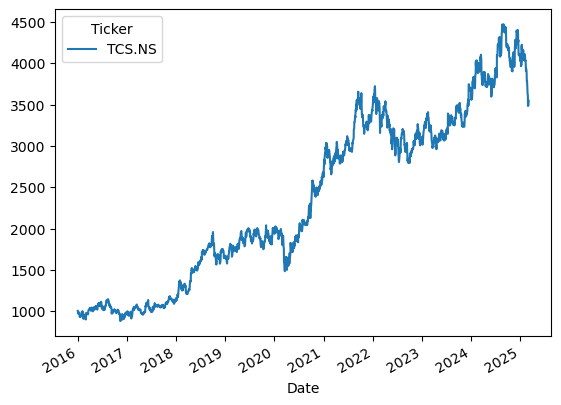

In [104]:
display(stockdata)
stockdata.Close.plot()


<h1>Time Series ForecastingUsing ARIMA Model</h2>

In [105]:
from statsmodels.tsa.arima.model import ARIMA 
# Train ARIMA Model
model = ARIMA(stockdata["Close"], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast next 10 days
forecast = model_fit.forecast(steps=10)
print(forecast)


2268    3546.702153
2269    3543.708637
2270    3543.636793
2271    3544.388722
2272    3544.697293
2273    3544.693489
2274    3544.627045
2275    3544.620339
2276    3544.634876
2277    3544.641323
Name: predicted_mean, dtype: float64


/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Pred

/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Pred

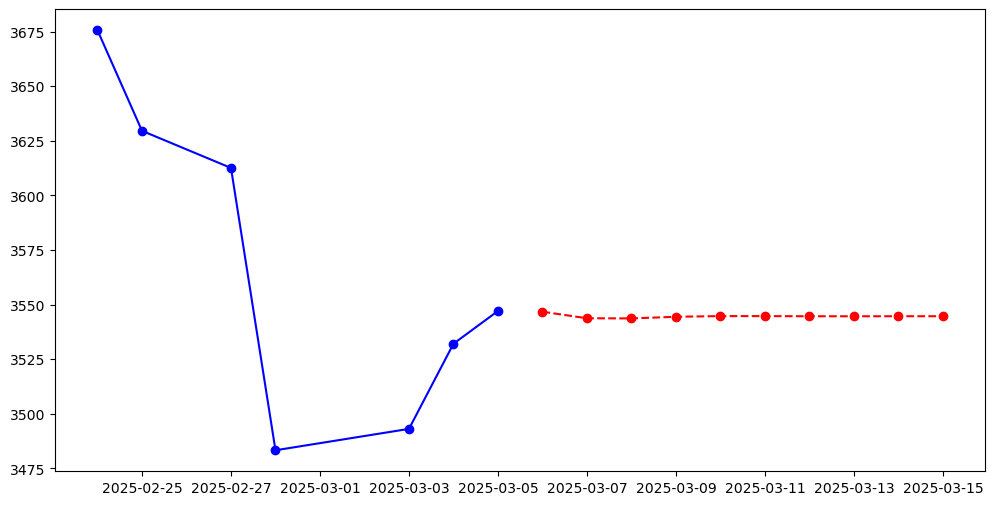

In [106]:
model = ARIMA(stockdata["Close"], order=(5,1,0))  # (p,d,q)
model_fit = model.fit()

# Forecast next 10 days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Create a future date range for the forecast
future_dates = pd.date_range(start=stockdata.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Select the last 7 days before forecasting for plotting
last_7_days = stockdata["Close"].iloc[-7:]

# Plot actual last 7 days and forecast
plt.figure(figsize=(12,6))
plt.plot(last_7_days.index, last_7_days, label="Actual Close Price (Last 7 Days)", color="blue", marker="o")
plt.plot(future_dates, forecast, label="ARIMA Forecast (Next 10 Days)", color="red", linestyle="dashed", marker="o")

In [107]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.13520D+00    |proj g|=  7.48740D-02


 This problem is unconstrained.



At iterate    5    f=  5.09913D+00    |proj g|=  1.63697D-02

At iterate   10    f=  5.00473D+00    |proj g|=  2.25256D-02

At iterate   15    f=  5.00423D+00    |proj g|=  1.20301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     19      1     0     0   1.203D-05   5.004D+00
  F =   5.0042317072110976     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


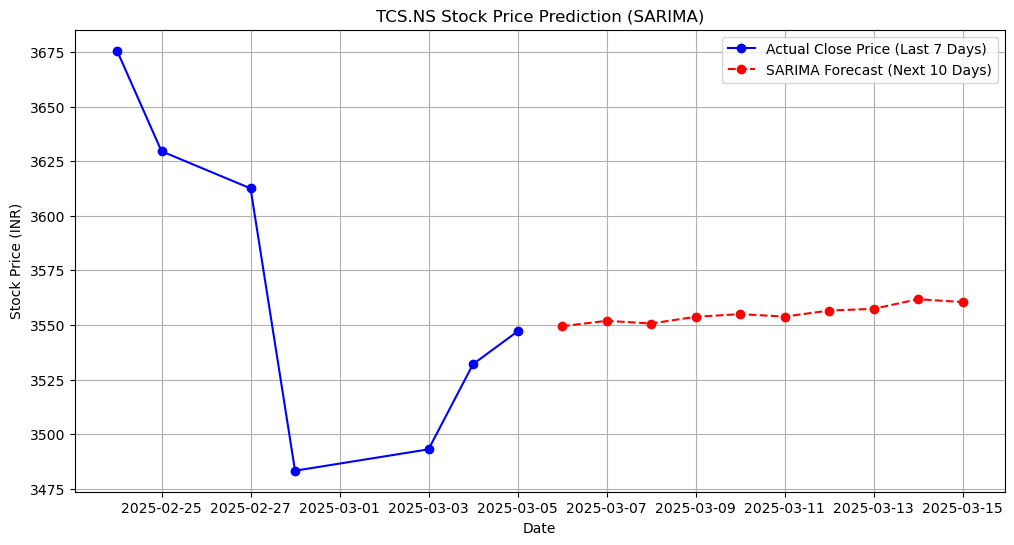

In [108]:
model = SARIMAX(stockdata["Close"], order=(5,1,0), seasonal_order=(1,1,1,7))  # (p,d,q) × (P,D,Q,s)
model_fit = model.fit()

# ✅ Forecast Next 10 Days
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# ✅ Create Future Dates for Forecast
future_dates = pd.date_range(start=stockdata.index[-1], periods=forecast_steps+1, freq='D')[1:]

# ✅ Select Last 7 Days for Plotting
last_7_days = stockdata["Close"].iloc[-7:]

# ✅ Plot Last 7 Days and SARIMA Forecast
plt.figure(figsize=(12,6))
plt.plot(last_7_days.index, last_7_days, label="Actual Close Price (Last 7 Days)", color="blue", marker="o")
plt.plot(future_dates, forecast, label="SARIMA Forecast (Next 10 Days)", color="red", linestyle="dashed", marker="o")

# Labels and Formatting
plt.xlabel("Date")
plt.ylabel("Stock Price (INR)")
plt.title(f"TCS.NS Stock Price Prediction (SARIMA)")
plt.legend()
plt.grid(True)

# Show the Plot
plt.show()

<h1> Using LSTM Model for Forecasting training on past 5 year data</h1>

<h3>Feature Engineering & Creating Sequence Length for Model</h3>

In [117]:
stockdata_5_year = yf.download(
    "TCS.NS",
    start = "2020-3-6",
    end = "2025-3-6",
    progress = False
)

In [118]:
df = stockdata_5_year[['Close']].copy()
df.info()
# df=df.fillna(method='ffill')

scaler = MinMaxScaler(feature_range=(-1, 1))
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2020-03-06 to 2025-03-05
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, TCS.NS)  1238 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


<h3>Creating Training and Testing Dataset & Converting to pytorch Tensors</h3>

In [119]:
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data)
    test_set_size = int(np.round(0.2*data.shape[0]))
    train_set_size = data.shape[0] - (test_set_size)
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length
x_train, y_train, x_test, y_test = load_data(df, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

x_train.shape =  (942, 59, 1)
y_train.shape =  (942, 1)
x_test.shape =  (236, 59, 1)
y_test.shape =  (236, 1)


<h3>LSTM Model</h3>


In [120]:
input_dim = 1
hidden_dim = 32
num_layers = 2 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        
        out = self.fc(out[:, -1, :]) 
        
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


<h3>Training The Model</h3>

In [121]:
num_epochs = 500
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.012436319142580032
Epoch  20 MSE:  0.003997511230409145
Epoch  30 MSE:  0.0024131566751748323
Epoch  40 MSE:  0.002103526843711734
Epoch  50 MSE:  0.0017813554732128978
Epoch  60 MSE:  0.001584353856742382
Epoch  70 MSE:  0.0014889718731865287
Epoch  80 MSE:  0.0014330121921375394
Epoch  90 MSE:  0.0013710653875023127
Epoch  100 MSE:  0.0013178649824112654
Epoch  110 MSE:  0.0012630907585844398
Epoch  120 MSE:  0.0012073839316144586
Epoch  130 MSE:  0.0011494961800053716
Epoch  140 MSE:  0.0010896481107920408
Epoch  150 MSE:  0.0010348997311666608
Epoch  160 MSE:  0.0026677448768168688
Epoch  170 MSE:  0.0011878516525030136
Epoch  180 MSE:  0.0011854592012241483
Epoch  190 MSE:  0.0011503960704430938
Epoch  200 MSE:  0.0010674095246940851
Epoch  210 MSE:  0.0010228846222162247
Epoch  220 MSE:  0.0009992074919864535
Epoch  230 MSE:  0.000974341994151473
Epoch  240 MSE:  0.0009542836924083531
Epoch  250 MSE:  0.0009350483887828887
Epoch  260 MSE:  0.0009167573298327625


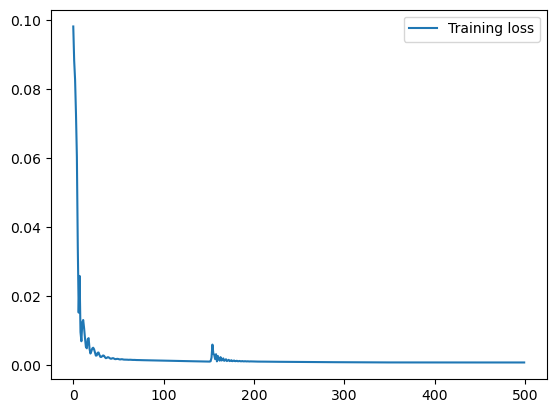

In [123]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [124]:
y_test_pred = model(x_test)

In [125]:
y_train_pred = scaler.inverse_transform(y_train_pred.detach())
y_train = scaler.inverse_transform(y_train.detach())
y_test_pred = scaler.inverse_transform(y_test_pred.detach())
y_test = scaler.inverse_transform(y_test.detach())

In [126]:
import math

In [127]:
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 41.77 RMSE


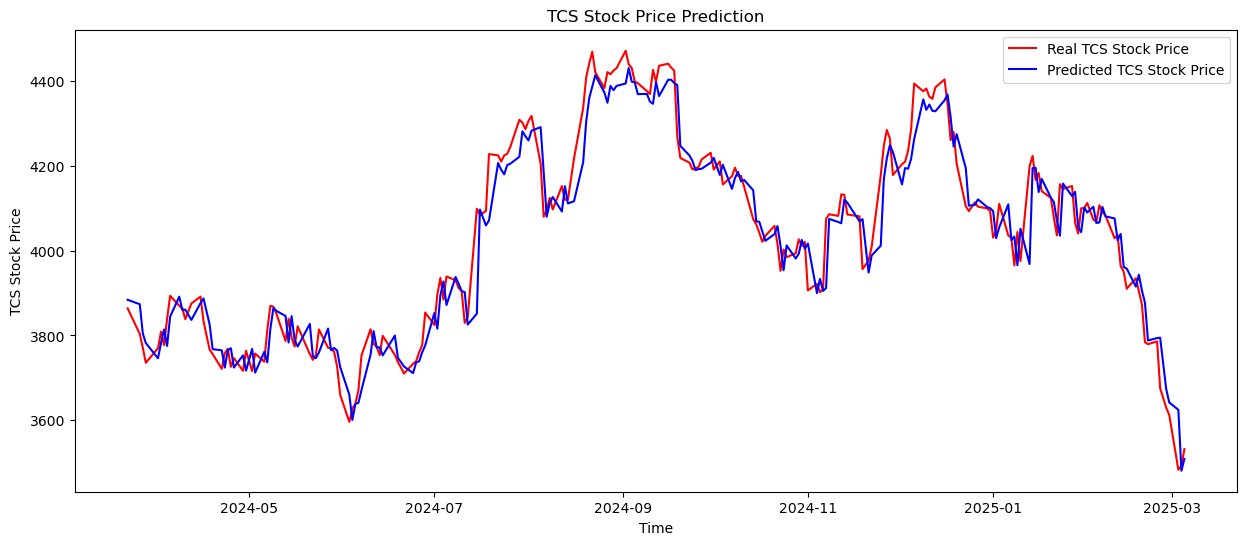

In [128]:
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(df[len(df)-len(y_test):].index, y_test, color = 'red', label = 'Real TCS Stock Price')
axes.plot(df[len(df)-len(y_test):].index, y_test_pred, color = 'blue', label = 'Predicted TCS Stock Price')
#axes.xticks(np.arange(0,394,50))
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.savefig('tcs_pred.png')
plt.show()

<h3> Training Random Forest Model</h3>

In [ ]:

ticker = 'TCS.NS'
data = yf.download(ticker, start='2020-3-6', end='2025-3-6')
data['Date'] = data.index
data = data[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
data.reset_index(drop=True, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [131]:
data['Day'] = data['Date'].dt.day
features = ['Open', 'High', 'Low', 'Volume', 'Day']
X = data[features]
y = data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

/home/umair123/anaconda3/envs/pytorch241/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [135]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 530.3589500680417


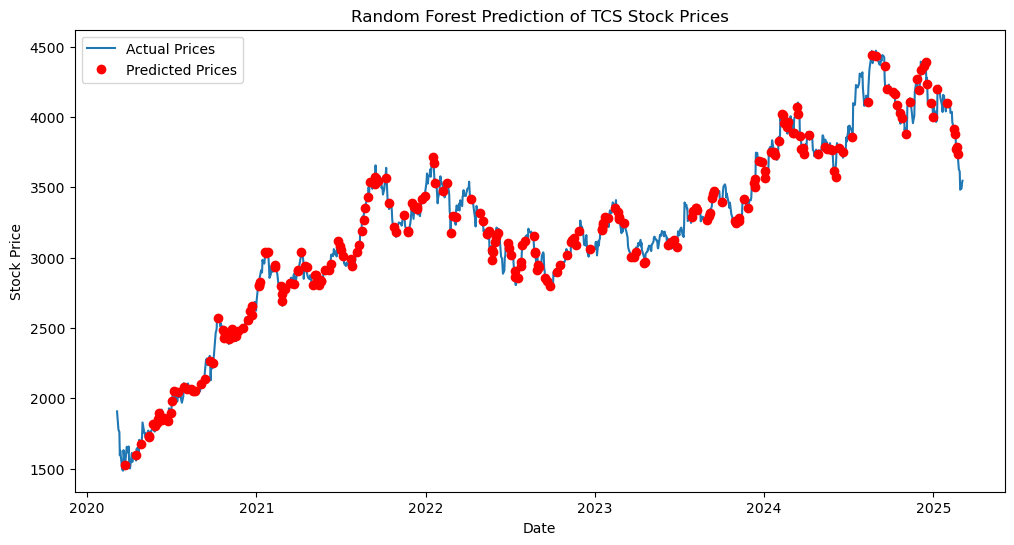

In [136]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(data['Date'][X_test.index], y_pred, 'ro', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Random Forest Prediction of TCS Stock Prices')
plt.legend()
plt.show()